In [173]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [174]:
data_conversion = pd.read_csv( "KAG_conversion_data.csv")

In [175]:
data_conversion

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.430000,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.820000,2,0
2,708771,916,103920,30-34,M,20,693,0,0.000000,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.250000,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.290000,1,1
...,...,...,...,...,...,...,...,...,...,...,...
1138,1314410,1178,179977,45-49,F,109,1129773,252,358.189997,13,2
1139,1314411,1178,179978,45-49,F,110,637549,120,173.880003,3,0
1140,1314412,1178,179979,45-49,F,111,151531,28,40.289999,2,0
1141,1314414,1178,179981,45-49,F,113,790253,135,198.710000,8,2


In [176]:
data_conversion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_id                1143 non-null   int64  
 1   xyz_campaign_id      1143 non-null   int64  
 2   fb_campaign_id       1143 non-null   int64  
 3   age                  1143 non-null   object 
 4   gender               1143 non-null   object 
 5   interest             1143 non-null   int64  
 6   Impressions          1143 non-null   int64  
 7   Clicks               1143 non-null   int64  
 8   Spent                1143 non-null   float64
 9   Total_Conversion     1143 non-null   int64  
 10  Approved_Conversion  1143 non-null   int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 98.4+ KB


In [177]:
#Dummy encode any categorical or object values in the data and save the resulting data 
#frame to variable X.
data=pd.get_dummies(data_conversion["gender"])

In [178]:
data.head(5)

,F,M
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [179]:
data1=data_conversion.drop('gender',axis='columns')
data1["M"]=data["M"].to_list()
data1["F"]=data["F"].to_list()
data1

,ad_id,xyz_campaign_id,fb_campaign_id,age,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,M,F
0,708746,916,103916,30-34,15,7350,1,1.430000,2,1,1,0
1,708749,916,103917,30-34,16,17861,2,1.820000,2,0,1,0
2,708771,916,103920,30-34,20,693,0,0.000000,1,0,1,0
3,708815,916,103928,30-34,28,4259,1,1.250000,1,0,1,0
4,708818,916,103928,30-34,28,4133,1,1.290000,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1138,1314410,1178,179977,45-49,109,1129773,252,358.189997,13,2,0,1
1139,1314411,1178,179978,45-49,110,637549,120,173.880003,3,0,0,1
1140,1314412,1178,179979,45-49,111,151531,28,40.289999,2,0,0,1
1141,1314414,1178,179981,45-49,113,790253,135,198.710000,8,2,0,1


In [180]:
data1.columns

Index(['ad_id', 'xyz_campaign_id', 'fb_campaign_id', 'age', 'interest',
       'Impressions', 'Clicks', 'Spent', 'Total_Conversion',
       'Approved_Conversion', 'M', 'F'],
      dtype='object')

In [181]:
data1['age'].replace(['30-34','35-39','40-44','45-49'],['1','2','3','4'],inplace=True)


In [182]:
data1

,ad_id,xyz_campaign_id,fb_campaign_id,age,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,M,F
0,708746,916,103916,1,15,7350,1,1.430000,2,1,1,0
1,708749,916,103917,1,16,17861,2,1.820000,2,0,1,0
2,708771,916,103920,1,20,693,0,0.000000,1,0,1,0
3,708815,916,103928,1,28,4259,1,1.250000,1,0,1,0
4,708818,916,103928,1,28,4133,1,1.290000,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1138,1314410,1178,179977,4,109,1129773,252,358.189997,13,2,0,1
1139,1314411,1178,179978,4,110,637549,120,173.880003,3,0,0,1
1140,1314412,1178,179979,4,111,151531,28,40.289999,2,0,0,1
1141,1314414,1178,179981,4,113,790253,135,198.710000,8,2,0,1


In [183]:
X=data1


In [184]:
#Using a heat map to show the correlation in the data
X.corr()

,ad_id,xyz_campaign_id,fb_campaign_id,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,M,F
ad_id,1.000000,0.929892,0.972002,0.456483,0.462308,0.431981,0.433053,0.346539,0.271331,0.058324,-0.058324
xyz_campaign_id,0.929892,1.000000,0.872392,0.272282,0.495273,0.469729,0.476689,0.346684,0.284968,0.086118,-0.086118
fb_campaign_id,0.972002,0.872392,1.000000,0.595753,0.439439,0.406978,0.403532,0.344170,0.257658,0.038037,-0.038037
interest,0.456483,0.272282,0.595753,1.000000,0.101973,0.088706,0.070226,0.120270,0.058353,-0.047230,0.047230
Impressions,0.462308,0.495273,0.439439,0.101973,1.000000,0.948514,0.970386,0.812838,0.684249,-0.067059,0.067059
Clicks,0.431981,0.469729,0.406978,0.088706,0.948514,1.000000,0.992906,0.694632,0.559526,-0.168725,0.168725
Spent,0.433053,0.476689,0.403532,0.070226,0.970386,0.992906,1.000000,0.725379,0.593178,-0.125022,0.125022
Total_Conversion,0.346539,0.346684,0.344170,0.120270,0.812838,0.694632,0.725379,1.000000,0.864034,-0.027559,0.027559
Approved_Conversion,0.271331,0.284968,0.257658,0.058353,0.684249,0.559526,0.593178,0.864034,1.000000,0.025350,-0.025350
M,0.058324,0.086118,0.038037,-0.047230,-0.067059,-0.168725,-0.125022,-0.027559,0.025350,1.000000,-1.000000


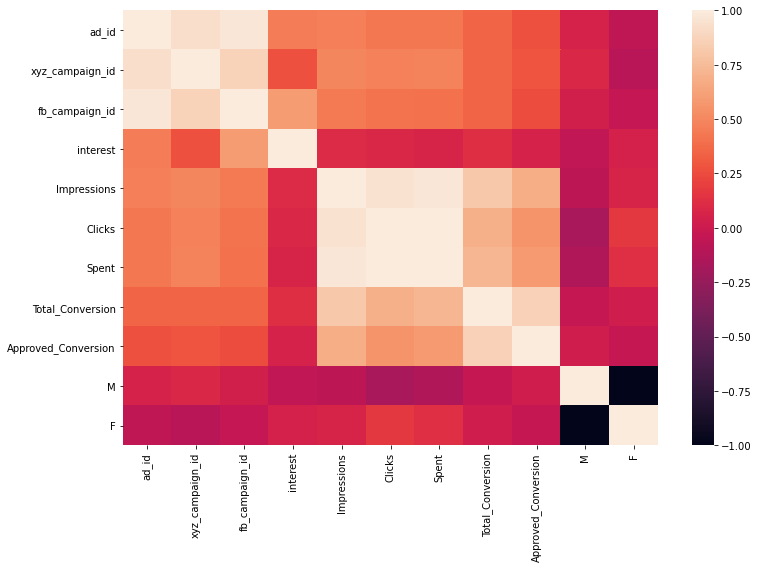

In [185]:
#Drop the first 4 columns in the data frame X.
plt.figure(figsize=(12,8))
sns.heatmap(X.corr())
plt.show()

In [186]:
X.drop(['ad_id', 'xyz_campaign_id', 'fb_campaign_id','interest'],axis=1,inplace=True)

In [187]:
X

,age,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,M,F
0,1,7350,1,1.430000,2,1,1,0
1,1,17861,2,1.820000,2,0,1,0
2,1,693,0,0.000000,1,0,1,0
3,1,4259,1,1.250000,1,0,1,0
4,1,4133,1,1.290000,1,1,1,0
...,...,...,...,...,...,...,...,...
1138,4,1129773,252,358.189997,13,2,0,1
1139,4,637549,120,173.880003,3,0,0,1
1140,4,151531,28,40.289999,2,0,0,1
1141,4,790253,135,198.710000,8,2,0,1


The columns that we have dropped have no effect to our data,from the heatmap the correlation is almot 1 or more.

In [188]:
 #Using the elbow method: 
#a. Determine the best number of clusters for the data in the range of 2 to 20
from sklearn.cluster import KMeans

In [189]:
mms=StandardScaler()
mms.fit(X)
x=mms.transform(X)

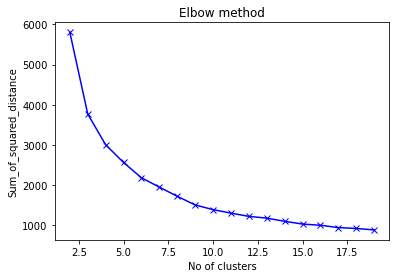

In [190]:
K=range(2,20)
Sum_of_squared_distance=[]
for k in K:
    km= KMeans(n_clusters=k)
    km.fit(x)
    Sum_of_squared_distance.append(km.inertia_)
plt.plot(K,Sum_of_squared_distance,'bx-')
plt.figure(1,figsize=(10,2))
plt.xlabel('No of clusters')
plt.ylabel('Sum_of_squared_distance')
plt.title('Elbow method')
plt.show()

The number of clusters is 4

In [191]:
#Based on the result above in 4b use the value at your elbow point to cluster the values in 
the data frame X.
km4=KMeans(n_clusters=4)
kmclusters=km4.fit(X)
kmclusters

KMeans(n_clusters=4)

In [192]:
print(kmclusters.labels_)

[0 0 0 ... 0 1 2]


In [193]:
y_means=(kmclusters.labels_)
y_means=pd.DataFrame(y_means,columns=['cluster'])
result.groupby('cluster').size()

cluster
0    840
1     93
2      6
3    204
dtype: int64

In [194]:
# Add the values in y_means to the original data frame (not X) as column ‘Advert_Type’.
y_means

,cluster
0,0
1,0
2,0
3,0
4,0
...,...
1138,1
1139,2
1140,0
1141,1


In [195]:
data_conversion['y_means']=y_means
data_conversion.rename(columns={'y_means':'Advert_Type'},inplace=True)

In [196]:
data_conversion

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,Advert_Type
0,708746,916,103916,30-34,M,15,7350,1,1.430000,2,1,0
1,708749,916,103917,30-34,M,16,17861,2,1.820000,2,0,0
2,708771,916,103920,30-34,M,20,693,0,0.000000,1,0,0
3,708815,916,103928,30-34,M,28,4259,1,1.250000,1,0,0
4,708818,916,103928,30-34,M,28,4133,1,1.290000,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1138,1314410,1178,179977,45-49,F,109,1129773,252,358.189997,13,2,1
1139,1314411,1178,179978,45-49,F,110,637549,120,173.880003,3,0,2
1140,1314412,1178,179979,45-49,F,111,151531,28,40.289999,2,0,0
1141,1314414,1178,179981,45-49,F,113,790253,135,198.710000,8,2,1


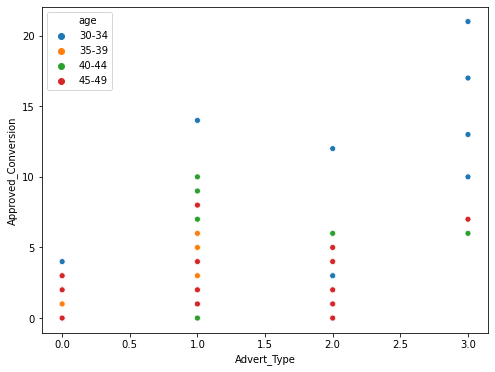

In [197]:
#Using any form of distribution plot of your choice and the original data frame, plot 2 
#graphs that can be used to answer the following:
plt.figure(figsize=(8,6))
sns.scatterplot(x = 'Advert_Type' ,y='Approved_Conversion', hue='age', data=data_conversion)


Advert type 1 it has a high amount of sales and all age groups are distributed.advert type 3 does not represent all age groups.

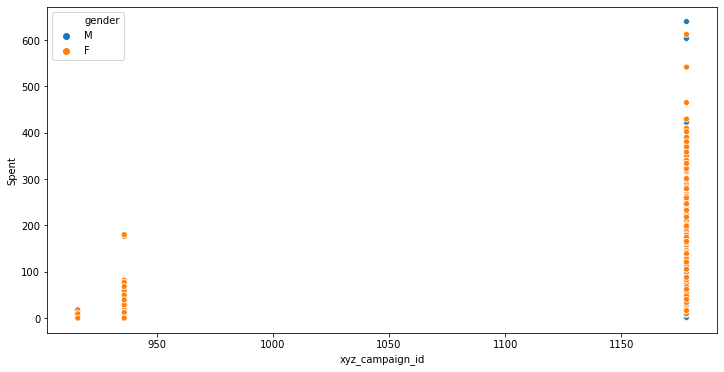

In [198]:
plt.figure(figsize=(12,6))
sns.scatterplot(x = 'xyz_campaign_id' ,y='Spent',hue='gender',data=data_conversion)

From the graph its observed that the company spent much on the female gender than the male gender.their products could be gender biased cause the females had much interest than the male. 

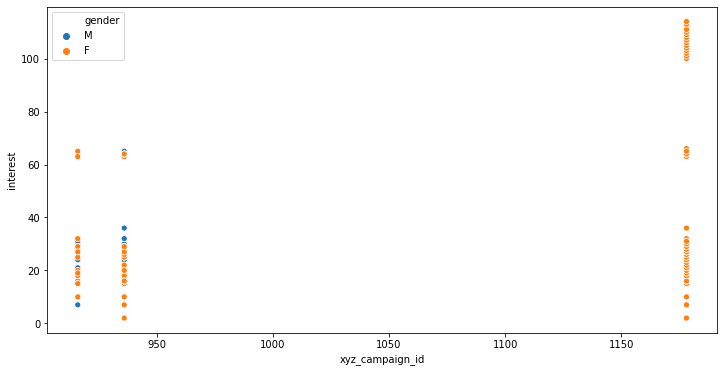

In [199]:
plt.figure(figsize=(12,6))
sns.scatterplot(x = 'xyz_campaign_id' ,y='interest',hue='gender',data=data_conversion)